In [1]:
pip install -q mediapipe

Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests

url = 'https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task'
filename = 'pose_landmarker.task'

response = requests.get(url)
with open(filename, 'wb') as file:
    file.write(response.content)
print(f"Downloaded {filename}")


Downloaded pose_landmarker.task


In [28]:
#@markdown To better demonstrate the Pose Landmarker API, we have created a set of visualization tools that will be used in this colab. These will draw the landmarks on a detect person, as well as the expected connections between those markers.

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np


def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image

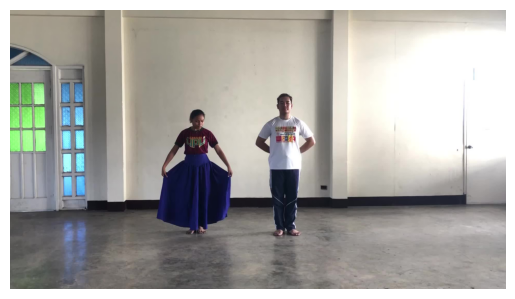

In [15]:
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("0001.jpg")

# Check if the image was loaded successfully
if img is None:
    print("Error: Unable to read the image file.")
else:
    # Convert the image from BGR (OpenCV format) to RGB (Matplotlib format)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Display the image using Matplotlib
    plt.imshow(img_rgb)
    plt.axis('off')  # Hide the axis
    plt.show()


In [21]:
# # STEP 1: Import the necessary modules.
# import cv2
# import mediapipe as mp
# from mediapipe.tasks import python
# from mediapipe.tasks.python import vision

# packet = mp.Packet()

# # STEP 2: Create an PoseLandmarker object.
# base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
# options = vision.PoseLandmarkerOptions(
#     running_mode=mp.tasks.vision.RunningMode.VIDEO,
#     base_options=base_options,
#     output_segmentation_masks=True)
# detector = vision.PoseLandmarker.create_from_options(options)

# # STEP 3: Load the input Video
# # Use OpenCV’s VideoCapture to load the input video.
# cap = cv2.VideoCapture("vid02.mp4")

# # Load the frame rate of the video using OpenCV’s CV_CAP_PROP_FPS
# # You’ll need it to calculate the timestamp for each frame.
# fps = int(cap.get(cv2.CAP_PROP_FPS))
# frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
# frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# # Define the codec and create VideoWriter object
# fourcc = cv2.VideoWriter_fourcc(*'mp4v')
# out = cv2.VideoWriter('output2.mp4', fourcc, fps, (frame_width, frame_height))

# frame_count = 0

# # Loop through each frame in the video using VideoCapture#read()
# while cap.isOpened():
#     # Read a single frame from the video
#     ret, frame = cap.read()
    
#     # Check if frame reading was successful
#     if not ret:
#         break
    
#     # Convert the frame received from OpenCV to a MediaPipe’s Image object.
#     numpy_frame_from_opencv = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#     mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=numpy_frame_from_opencv)

#     # STEP 4: Detect pose landmarks from the input image.
#     timestamp_ms = int((frame_count / fps) * 1000)  # Calculate the timestamp in milliseconds
#     detection_result = detector.detect_for_video(mp_image, timestamp_ms)

#     # STEP 5: Process the detection result. In this case, visualize it.
#     annotated_image = draw_landmarks_on_image(numpy_frame_from_opencv, detection_result)
    
#     # Convert the annotated image back to BGR for OpenCV
#     output_frame = cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR)
    
#     # Write the frame to the output video
#     out.write(output_frame)
    
#     # Display the resulting frame
#     cv2.imshow('Pose Detection', output_frame)
    
#     # Press 'q' on the keyboard to exit the loop
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

#     frame_count += 1

# # When everything done, release the video capture and writer objects
# cap.release()
# out.release()
# cv2.destroyAllWindows()

c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [31]:
# STEP 1: Import the necessary modules.
import cv2
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

packet = mp.Packet()

# STEP 2: Create an PoseLandmarker object.
base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
options = vision.PoseLandmarkerOptions(
    running_mode=mp.tasks.vision.RunningMode.VIDEO,
    base_options=base_options,
    output_segmentation_masks=True)
detector = vision.PoseLandmarker.create_from_options(options)

def save_landmarks_and_timestamps(detection_result, timestamp_ms, filename):
    with open(filename, 'a') as file:
        for pose_landmarks in detection_result.pose_landmarks:
            landmarks_data = []
            for landmark in pose_landmarks:
                landmarks_data.append((landmark.x, landmark.y, landmark.z))
            file.write(f"{timestamp_ms} {landmarks_data}\n")


# STEP 3: Load the input Video
# Use OpenCV’s VideoCapture to load the input video.
cap = cv2.VideoCapture("vid02.mp4")

# Load the frame rate of the video using OpenCV’s CV_CAP_PROP_FPS
# You’ll need it to calculate the timestamp for each frame.
fps = int(cap.get(cv2.CAP_PROP_FPS))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output2.mp4', fourcc, fps, (frame_width, frame_height))

frame_count = 0
landmarks_filename = 'landmarks_data.txt'
# Loop through each frame in the video using VideoCapture#read()
while cap.isOpened():
    # Read a single frame from the video
    ret, frame = cap.read()
    
    # Check if frame reading was successful
    if not ret:
        break
    
    # Convert the frame received from OpenCV to a MediaPipe’s Image object.
    numpy_frame_from_opencv = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=numpy_frame_from_opencv)

    # STEP 4: Detect pose landmarks from the input image.
    timestamp_ms = int((frame_count / fps) * 1000)  # Calculate the timestamp in milliseconds
    detection_result = detector.detect_for_video(mp_image, timestamp_ms)
   
    # Save the detected landmarks and timestamps
    save_landmarks_and_timestamps(detection_result, timestamp_ms, landmarks_filename)
    
    # STEP 5: Process the detection result. In this case, visualize it.
    annotated_image = draw_landmarks_on_image(numpy_frame_from_opencv, detection_result)
    
    # Convert the annotated image back to BGR for OpenCV
    output_frame = cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR)
    
    # Write the frame to the output video
    out.write(output_frame)
    
    # Display the resulting frame
    cv2.imshow('Pose Detection', output_frame)
    
    # Press 'q' on the keyboard to exit the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    frame_count += 1

# When everything done, release the video capture and writer objects
cap.release()
out.release()
cv2.destroyAllWindows()

c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [32]:
# # Function to load saved landmarks and timestamps
# def load_landmarks_and_timestamps(filename):
#     landmarks_data = []
#     with open(filename, 'r') as file:
#         for line in file:
#             parts = line.strip().split(' ', 1)
#             timestamp_ms = int(parts[0])
#             landmarks_data.append((timestamp_ms, eval(parts[1])))
#     return landmarks_data

# while cap.isOpened():
#     # Read a single frame from the video
#     ret, frame = cap.read()
    
#     # Check if frame reading was successful
#     if not ret:
#         break
    
#     # Convert the frame received from OpenCV to a MediaPipe’s Image object.
#     numpy_frame_from_opencv = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#     mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=numpy_frame_from_opencv)

#     # STEP 4: Detect pose landmarks from the input image.
#     timestamp_ms = int((frame_count / fps) * 1000)  # Calculate the timestamp in milliseconds
#     detection_result = detector.detect_for_video(mp_image, timestamp_ms)

#     # Save the detected landmarks and timestamps
#     save_landmarks_and_timestamps(detection_result, timestamp_ms, landmarks_filename)

# # STEP 3: Load the input Video (second video)
# cap = cv2.VideoCapture("vid02.mp4")
# fps = int(cap.get(cv2.CAP_PROP_FPS))

# # Load the saved landmarks and timestamps for scoring the second video
# landmarks_data = load_landmarks_and_timestamps(landmarks_filename)
